# COGS 108 - Study on the Relationship Between Game Features & Rating

# Link to Video
https://drive.google.com/file/d/19UO5UiY8X43yt5wWWXplpERb-ww2OsTF/view

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

For our project, we obtained & processed data on video games to discern the relationship between game features and game ratings. To this end, we found a comprehensive dataset on video game attributes including our main attributes of interest (gamefeatures & ratings), then cleaned, processed, visualized, and analyzed these results to determine what relationship between game features and game ratings existed.

From our visualizations, we saw that four features stood out as most common in the past half-decade among the top 100 rated games of each year. From our analysis, we saw that the majority of them did not support rejecting our null hypothesis, and that we cannot claim that any features have an affect on a games probability of reaching a score amongst the top 100 of it's publishing year.

# Names

- Gavin d'Heilly 
- Ryan Truong 
- Andrew Minh Nguyen 
- Kophi Westerman
- David Thai

<a id='research_question'></a>
# Research Question

What makes games popular? How has the taste of the market & community changed over time? For our study, we're looking at what (if any) 10 game features have been most highly correlated with a game achieving a metacritic rating (mainstream content review forum rating score) among the top 100 of each publishing year in the past half-decade (from 2017 to 2022). 

These features are colloquially recognized as properties of games which are relevant to the experience and can make or break interest. The features that will be analyzed includes: gameplay type, progression type, style, and producer category.

<a id='background'></a>

## Background & Prior Work

The world of video games is dynamic and varied, with each new title offering unique elements that can significantly impact its popularity. We are particularly interested in understanding the key elements that have led to a game achieving a metacritic rating among the top 100 of each publishing year in the half past-decade. To do this, we're focusing on a broad list of features (defined in the extensive library of video game metadata, RAWG) comprised of colloquially recognized features such as genre, multiplayer capabilities, character types, mechanics, and more.

Categorizing and understanding the influence of these features is a complex task. Caldwell (2004) pointed out the difficulty in making general claims due to the diverse strategies deployed by different game genres and sub-genres [^2]. This is why we've opted for a heuristic in the form of a list of features that has emerged organically from the gaming community over time. This approach allows us to cover a wide range of potential factors, acknowledging the diversity and complexity of games, as well as the differing tastes and preferences among gamers. In essence, it's not just what we, as researchers, believe are important features, but what the gaming community itself has highlighted as impactful.

The player preference, a reflection of the gaming community's voice, is a source of great interest for many interesting discoveries and possible applications. For example, a YouGov survey from 2021 to 20222 noted a 31% increase in players favoring games with innovative mechanics and engaging narratives across PC and console platforms. This trend corresponds with the growing offerings of platforms like Steam and Microsoft Game Pass, which have widened their catalogs to include games with diverse, unique features [^3].

More specific trends between game features and success could help determine business decisions in the industry. For example, larger studios are reported as often grappleing with maintaining originality, ensuring creative freedom, and fostering a positive work environment [^3][^4]. These challenges can directly impact the types of features that make it into their games. In response to these challenges, many developers have shifted to smaller studios, where they can exert more control over game features[^4].

Despite the evolving understanding of these dynamics, much remains unknown. The gaming market continues to expand, as Ernst & Young Global Limited observed in 2019 [^5], but which game features are most strongly rooting the fanbase of this expansion  in the past half-decade is not yet clear. This research project seeks to close that gap, offering a more defined understanding of the factors that contribute to a video game's success & community adoration.

Disclaimer:
While valuable for initial trend recognitions, there is convincing claims from Caldwell (2004) that given the interactive nature of video game characteristics[^1], there is a need for a nuanced approach to discussing video games. This work stands merely to provide surface level insights of such interactive variables & high dimensional morhpological space.

Footnotes

1: Apperley, T. H. (2006). Genre and game studies: Toward a critical approach to video game genres. Simulation & gaming, 37(1), 6-23.

2: Caldwell, N. (2004). Theoretical frameworks for analysing turn-based computer strategy games. Media International Australia, 110(1), 42-51. 

3: Bruce, G. (17 Mar 2022) US: Charting the rise of indie video games YouGov. https://business.yougov.com/content/41600-us-charting-rise-indie-video-games

4: Wall, S. (12 Aug 2022) Should I work for an AAA or Indie video game studio? cgspectrum. https://www.cgspectrum.com/blog/difference-between-aaa-vs-indie-game-studio 

5: Curtis, M. (14 Nov 2019) EY survey reveals video gaming industry at tipping point as new competitive pressures intensify battle for market share EY. https://www.ey.com/en_gl/news/2019/11/ey-survey-reveals-video-gaming-industry-at-tipping-point-as-new-competitive-pressures-intensify-battle-for-market-share

# Hypothesis


Regardless of the dynamic nature of game features & subjective taste, we imagine that some number and type of game features will have an influence on a games ability to reach a metacritic rating among the top 100 of their year.

Specifically, we predict that a subset of the features analyzed from our dataset will have a positive effect on the chances of a game achieving a metacritic rank among the top 100 of it's publishing year.

# Dataset

- Dataset Name: RAWG
- Link to the dataset: https://api.rawg.io/docs/
- Number of observations: ~350,000

A site which has the largest & most detailed database of video games of all platforms, including a substantial API for interacting with & pulling out data. The dataset includes columns such as publish year, tags, genres, title of game, and meta critic score.

# Setup

In [1]:
# After running this cell, please restart the notebook
! python3 -m pip install rawg --user

In [2]:
# Data Analysis Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# API and CSV writing
import requests
import csv
import os.path
# Statistical Analysis
import scipy
from scipy.stats import ttest_ind, f_oneway

# RAWG database API
import rawg

In [3]:
# This function takes in the game id (slug) and returns the genres for the specified game
def get_game_genre(slug):
    url = f"https://api.rawg.io/api/games/{slug}"
    params = {
        "key": "cc55d181f8914dc8b59fc15786d6d338" 
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        genres = data.get("genres", [])
        genre_names = [genre.get("name") for genre in genres]
        #print(f"Genres: {', '.join(genre_names)}")
        return genre_names
    else:
        print(f"{slug} has no genres")

# This function takes in the game id (slug) and returns the tags for a specified game
def get_tag(slug):
    url = f"https://api.rawg.io/api/games/{slug}"
    params = {
        "key": "cc55d181f8914dc8b59fc15786d6d338" 
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        genres = data.get("tags", [])
        genre_names = [genre.get("name") for genre in genres]
        #print(f"Genres: {', '.join(genre_names)}")
        return genre_names
    else:
        print(f"{slug} has no genres")

In [4]:
# This function reads in all games by year, sorts it by Metacritic rating,
# and writes to a CSV the game including the genre and tags using the helper functions
def read(year):
    url = "https://api.rawg.io/api/games"
    params = {
        "key": "cc55d181f8914dc8b59fc15786d6d338",  
        "ordering": "-metacritic",  # Sort by descending order
        "page_size": 1, # Fetches 1 game right now
        "page": 5, # number is overwritten in params
       "dates": f"{year}-01-01,{year}-12-31", # grabs data from the year
    }
    
    mode = ""
    filename = "test.csv"
    
    if os.path.isfile(filename):
        mode = "a"
    else:
        mode = "w"
    
    with open(filename, mode, newline="", encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        
        if mode == "w":
            writer.writerow(["Name", "Metacritic Score","Released","slug", "genre_names", "tags"])  
            
        # range is 100 pages
        for page in range(1, 101):
            params["page"] = page
        
        # gets data from RAWG
            response = requests.get(url, params=params)
        
        # I asssume this is the success code
            if response.status_code == 200:
            
                data = response.json()
            # puts data from games into "games"
                games = data.get("results", [])
            
                for game in games:
                    name = game.get("name")
                    metacritic = game.get("metacritic")
                    released = game.get("released")
                    slug = game.get("slug")
                    
                    genre_names = get_game_genre(slug)
                    tags = get_tag(slug)

                    writer.writerow([name, metacritic, released, slug, genre_names, tags])
                    #print(f"Name: {name}")
                    #print(f"Year: {released}")
                    #print(f"slug: {slug}")
                    #print(f"Genres: {', '.join(genre_names)}")
                    #print(f"Metacritic Score: {metacritic}")
                    #print("------------------")
            else:
                print("Error occurred:", response.status_code)
                
    print(f"Done with {year}")

In [ ]:
# Calls function to use API and generate CSV
read(2017)

In [ ]:
# Calls function to use API and generate CSV
read(2018)

In [ ]:
# Calls function to use API and generate CSV
read(2019)

In [ ]:
# Calls function to use API and generate CSV
read(2020)

In [ ]:
# Calls function to use API and generate CSV
read(2021)

In [ ]:
# Calls function to use API and generate CSV
read(2022)

# Data Cleaning

We obtained our datasets from the RAWG website (see [Dataset](#Dataset(s)) for more information). This website encapsulates a video game database that has its own API, which we utilized in order to generate a desirable CSV file. Instead of starting with a CSV file that had unnecessary categories and filtering from there, we were able to take advatange of the RAWG API to scrape data and generate a CSV file that had all the fields we needed (see [Setup](#Setup) for more details). The first step was to call the API to get the top 100 games based on Metacritic score from 2017-2022. In addition to the name of the games, we obtained the Metacritic score for each game, its release date, slug (id for the game), the game's genres, and tags. Once these fields were achieved we used Python to write the row entries into a CSV file, ultimately retrieving the top 100 games and its categories from 2017-2022.

Once the CSV file was generated, we used Pandas to create a DataFrame called `games` by reading in the CSV file. To confirm that we successfully created and formatted the file by using the API and our Python functions, we looked at the first 10 entries using `head`. The next step performed was adding a `Years` column to the DataFrame for future analysis. To do so, we took advantage of the fact that every 100 games corresponded to a year and created a list to append to the DataFrame. Once this was done, the last cleaning step necessary was to get rid of the entries that had no genres or tags (no `genre_names` or `tags`). To do so we replaced the columns that had the string empty list `'[]'`, for either the genre or the tags, with `NaN` in order to be filtered. After this was done we were able to use the `dropna` function to get rid of these entries. Lastly, we had to reset the index which was done with `reset_index`.

To summarize how 'clean' our data is, we can conclude that we have all the desired fields without having to worry about undesirable categories. This is due to the fact that we started with an API to scrape the fields we desired, thus the initial setup saved us time while cleaning. In addition, we were able to clean out entries that were missing categories and ultimately confirm that each entry has sufficient data needed for further analysis.

In [5]:
# Read in game data
games = pd.read_csv("2017to2022.csv")

# Check the first few rows of the data
games.head(10)

,Name,Metacritic Score,Released,slug,genre_names,tags
0,Super Mario Odyssey,97,2017-10-27,super-mario-odyssey,"['Arcade', 'Platformer']","['Singleplayer', 'Local Multiplayer', 'exclusi..."
1,The Legend of Zelda: Breath of the Wild,97,2017-03-03,the-legend-of-zelda-breath-of-the-wild,"['Action', 'Adventure', 'RPG']","['RPG', 'Open World', 'Sandbox', 'Action-Adven..."
2,Divinity: Original Sin 2,95,2017-09-14,divinity-original-sin-2,"['RPG', 'Strategy']","['Singleplayer', 'Multiplayer', 'Full controll..."
3,XCOM 2: War of the Chosen,95,2017-08-29,xcom-2-war-of-the-chosen,['Strategy'],"['Singleplayer', 'Steam Achievements', 'Multip..."
4,Mario Kart 8 Deluxe,92,2017-04-27,mario-kart-8-deluxe,['Racing'],"['Multiplayer', 'Funny', 'exclusive', 'Family ..."
5,OKAMI HD,92,2017-12-12,okami-hd-da-shen-jue-jing-ban,"['Action', 'Adventure']","['Singleplayer', 'Atmospheric', 'Story Rich', ..."
6,DRAGON QUEST XI: Echoes of an Elusive Age,91,2017-07-29,dragon-quest-xi,['RPG'],"['Singleplayer', 'Steam Achievements', 'Full c..."
7,FROST - A dream odyssey,89,2017-10-16,frost-a-dream-odyssey,['Puzzle'],"['Touch-Friendly', 'Abstract']"
8,Framed 2,89,2017-06-14,framed-2,"['Adventure', 'Puzzle']","['Story', 'ship']"
9,Nex Machina,89,2017-06-19,nex-machina,"['Action', 'Indie']","['Singleplayer', 'Steam Achievements', 'Full c..."


In [6]:
# Add a column to the dataframe for year the game was in the top 100
years_list = []
for i in range(600):
    if i < 100:
        years_list.append('2017')
    elif i >= 100 and i < 200:
        years_list.append('2018')
    elif i >= 200 and i < 300:
        years_list.append('2019')
    elif i >= 300 and i < 400:
        years_list.append('2020')
    elif i >= 400 and i < 500:
        years_list.append('2021')
    else:
        years_list.append('2022')

games['Year'] = years_list

In [7]:
# Get rid of entries that have no genre_names or tags
games['genre_names'].replace('[]', np.nan, inplace=True)
games['tags'].replace('[]', np.nan, inplace=True)
games.dropna(subset=['genre_names','tags'],inplace=True)
games.reset_index(allow_duplicates=False,inplace=True,drop=True)


In [8]:
# adds metacritic rating to each game
def score_classifier(score):
    if score >= 95:
        return '95-100'
    elif score >= 90:
        return '90-94'
    elif score >= 85:
        return '85-89'
    elif score >= 80:
        return '80-84'
    elif score >= 75:
        return '75-79'
    elif score >= 70:
        return '70-74'
    else:
        return '<70'

games['Metacritic Range'] = games['Metacritic Score'].apply(score_classifier)
games

,Name,Metacritic Score,Released,slug,genre_names,tags,Year,Metacritic Range
0,Super Mario Odyssey,97,2017-10-27,super-mario-odyssey,"['Arcade', 'Platformer']","['Singleplayer', 'Local Multiplayer', 'exclusi...",2017,95-100
1,The Legend of Zelda: Breath of the Wild,97,2017-03-03,the-legend-of-zelda-breath-of-the-wild,"['Action', 'Adventure', 'RPG']","['RPG', 'Open World', 'Sandbox', 'Action-Adven...",2017,95-100
2,Divinity: Original Sin 2,95,2017-09-14,divinity-original-sin-2,"['RPG', 'Strategy']","['Singleplayer', 'Multiplayer', 'Full controll...",2017,95-100
3,XCOM 2: War of the Chosen,95,2017-08-29,xcom-2-war-of-the-chosen,['Strategy'],"['Singleplayer', 'Steam Achievements', 'Multip...",2017,95-100
4,Mario Kart 8 Deluxe,92,2017-04-27,mario-kart-8-deluxe,['Racing'],"['Multiplayer', 'Funny', 'exclusive', 'Family ...",2017,90-94
...,...,...,...,...,...,...,...,...
537,Sifu,79,2022-02-08,sifu,"['Action', 'Fighting']","['Singleplayer', 'Third Person', 'Difficult', ...",2022,75-79
538,NBA 2K23,79,2022-09-09,nba-2k23,"['Simulation', 'Sports']","['Singleplayer', 'Steam Achievements', 'Multip...",2022,75-79
539,Kombinera,79,2022-04-07,kombinera,"['Action', 'Puzzle']","['Singleplayer', 'Steam Achievements', 'Full c...",2022,75-79
540,MultiVersus,79,2022-07-26,multiversus,"['Action', 'Fighting']","['Singleplayer', 'Steam Achievements', 'Multip...",2022,75-79


In [9]:
# Check to make sure index is updated and games are removed
games.head(10)

,Name,Metacritic Score,Released,slug,genre_names,tags,Year,Metacritic Range
0,Super Mario Odyssey,97,2017-10-27,super-mario-odyssey,"['Arcade', 'Platformer']","['Singleplayer', 'Local Multiplayer', 'exclusi...",2017,95-100
1,The Legend of Zelda: Breath of the Wild,97,2017-03-03,the-legend-of-zelda-breath-of-the-wild,"['Action', 'Adventure', 'RPG']","['RPG', 'Open World', 'Sandbox', 'Action-Adven...",2017,95-100
2,Divinity: Original Sin 2,95,2017-09-14,divinity-original-sin-2,"['RPG', 'Strategy']","['Singleplayer', 'Multiplayer', 'Full controll...",2017,95-100
3,XCOM 2: War of the Chosen,95,2017-08-29,xcom-2-war-of-the-chosen,['Strategy'],"['Singleplayer', 'Steam Achievements', 'Multip...",2017,95-100
4,Mario Kart 8 Deluxe,92,2017-04-27,mario-kart-8-deluxe,['Racing'],"['Multiplayer', 'Funny', 'exclusive', 'Family ...",2017,90-94
5,OKAMI HD,92,2017-12-12,okami-hd-da-shen-jue-jing-ban,"['Action', 'Adventure']","['Singleplayer', 'Atmospheric', 'Story Rich', ...",2017,90-94
6,DRAGON QUEST XI: Echoes of an Elusive Age,91,2017-07-29,dragon-quest-xi,['RPG'],"['Singleplayer', 'Steam Achievements', 'Full c...",2017,90-94
7,FROST - A dream odyssey,89,2017-10-16,frost-a-dream-odyssey,['Puzzle'],"['Touch-Friendly', 'Abstract']",2017,85-89
8,Framed 2,89,2017-06-14,framed-2,"['Adventure', 'Puzzle']","['Story', 'ship']",2017,85-89
9,Nex Machina,89,2017-06-19,nex-machina,"['Action', 'Indie']","['Singleplayer', 'Steam Achievements', 'Full c...",2017,85-89


In [10]:
games.shape

(542, 8)

### Data Dictionary:

    * Name: Name of the video game
    * Metacritic Score: The metacritic score of the video game
    * Released: The release date of the video game
    * slug: The ID of the video game
    * genre_names: The genre of the video game
    * tags: The tags of the video game
    * Year: The release year of the video game
    * Metacritic range: The range of the metacritic scores in intervals of 5

# Data Analysis & Results

For the processing & visualizing of our data, we perform the following:
- Data Pre-processing
- Visualizations:
    - Countplot Graph of the Distribution of Metacritic Scores by Year
    - Countplot Graph of the Top 10 Most Common Features Each Year
    - Countplot Graph of the Frequency of the Top Ten Features of Each Year Grouped by Metacritic Score
    - Lineplot Graph of the Frequency of the Top Ten Features of Each Year
- Analysis':
    - Chi-Square Test: How does the actual distribution compare to a no-correlation distribution?
    - T-test: How do the means of the score of games with the top 10 features compare to the means of the rest?
    - Analysis-of-Variance (ANOVA) Test: How do the distributions of scores of games grouped by features compare?

## Data Pre-processing

In [11]:
# creates a new column for features and places them into a list of strings.
def concat_feat(row):
    genre_row = row['genre_names'].strip('[]').replace("'","").split(", ")
    #tags_row = row['tags'].strip('[]').replace("'","").split(", ") 
    return genre_row

games['features'] = games.apply(concat_feat,axis=1)
games

,Name,Metacritic Score,Released,slug,genre_names,tags,Year,Metacritic Range,features
0,Super Mario Odyssey,97,2017-10-27,super-mario-odyssey,"['Arcade', 'Platformer']","['Singleplayer', 'Local Multiplayer', 'exclusi...",2017,95-100,"[Arcade, Platformer]"
1,The Legend of Zelda: Breath of the Wild,97,2017-03-03,the-legend-of-zelda-breath-of-the-wild,"['Action', 'Adventure', 'RPG']","['RPG', 'Open World', 'Sandbox', 'Action-Adven...",2017,95-100,"[Action, Adventure, RPG]"
2,Divinity: Original Sin 2,95,2017-09-14,divinity-original-sin-2,"['RPG', 'Strategy']","['Singleplayer', 'Multiplayer', 'Full controll...",2017,95-100,"[RPG, Strategy]"
3,XCOM 2: War of the Chosen,95,2017-08-29,xcom-2-war-of-the-chosen,['Strategy'],"['Singleplayer', 'Steam Achievements', 'Multip...",2017,95-100,[Strategy]
4,Mario Kart 8 Deluxe,92,2017-04-27,mario-kart-8-deluxe,['Racing'],"['Multiplayer', 'Funny', 'exclusive', 'Family ...",2017,90-94,[Racing]
...,...,...,...,...,...,...,...,...,...
537,Sifu,79,2022-02-08,sifu,"['Action', 'Fighting']","['Singleplayer', 'Third Person', 'Difficult', ...",2022,75-79,"[Action, Fighting]"
538,NBA 2K23,79,2022-09-09,nba-2k23,"['Simulation', 'Sports']","['Singleplayer', 'Steam Achievements', 'Multip...",2022,75-79,"[Simulation, Sports]"
539,Kombinera,79,2022-04-07,kombinera,"['Action', 'Puzzle']","['Singleplayer', 'Steam Achievements', 'Full c...",2022,75-79,"[Action, Puzzle]"
540,MultiVersus,79,2022-07-26,multiversus,"['Action', 'Fighting']","['Singleplayer', 'Steam Achievements', 'Multip...",2022,75-79,"[Action, Fighting]"


In [12]:
# We needed a way to separate the lists in games into strings so we used explode to
# separate the features into their own column
game_features_separated = games.explode('features')

index1 = game_features_separated[game_features_separated['Year']=='2017']['features'].value_counts().iloc[:10].index
index2 = game_features_separated[game_features_separated['Year']=='2018']['features'].value_counts().iloc[:10].index
index3 = game_features_separated[game_features_separated['Year']=='2019']['features'].value_counts().iloc[:10].index
index4 = game_features_separated[game_features_separated['Year']=='2020']['features'].value_counts().iloc[:10].index
index5 = game_features_separated[game_features_separated['Year']=='2021']['features'].value_counts().iloc[:10].index
index6 = game_features_separated[game_features_separated['Year']=='2022']['features'].value_counts().iloc[:10].index

game_features_separated

,Name,Metacritic Score,Released,slug,genre_names,tags,Year,Metacritic Range,features
0,Super Mario Odyssey,97,2017-10-27,super-mario-odyssey,"['Arcade', 'Platformer']","['Singleplayer', 'Local Multiplayer', 'exclusi...",2017,95-100,Arcade
0,Super Mario Odyssey,97,2017-10-27,super-mario-odyssey,"['Arcade', 'Platformer']","['Singleplayer', 'Local Multiplayer', 'exclusi...",2017,95-100,Platformer
1,The Legend of Zelda: Breath of the Wild,97,2017-03-03,the-legend-of-zelda-breath-of-the-wild,"['Action', 'Adventure', 'RPG']","['RPG', 'Open World', 'Sandbox', 'Action-Adven...",2017,95-100,Action
1,The Legend of Zelda: Breath of the Wild,97,2017-03-03,the-legend-of-zelda-breath-of-the-wild,"['Action', 'Adventure', 'RPG']","['RPG', 'Open World', 'Sandbox', 'Action-Adven...",2017,95-100,Adventure
1,The Legend of Zelda: Breath of the Wild,97,2017-03-03,the-legend-of-zelda-breath-of-the-wild,"['Action', 'Adventure', 'RPG']","['RPG', 'Open World', 'Sandbox', 'Action-Adven...",2017,95-100,RPG
...,...,...,...,...,...,...,...,...,...
540,MultiVersus,79,2022-07-26,multiversus,"['Action', 'Fighting']","['Singleplayer', 'Steam Achievements', 'Multip...",2022,75-79,Action
540,MultiVersus,79,2022-07-26,multiversus,"['Action', 'Fighting']","['Singleplayer', 'Steam Achievements', 'Multip...",2022,75-79,Fighting
541,Metal: Hellsinger,79,2022-09-15,metal-hellsinger,"['Action', 'Shooter', 'Adventure']","['Singleplayer', 'Steam Achievements', 'Atmosp...",2022,75-79,Action
541,Metal: Hellsinger,79,2022-09-15,metal-hellsinger,"['Action', 'Shooter', 'Adventure']","['Singleplayer', 'Steam Achievements', 'Atmosp...",2022,75-79,Shooter


## Visualizations

### Countplot Graph of the Distribution of Metacritic Scores by Year

First we want to visualize the overall range of the top 100 scores for each year

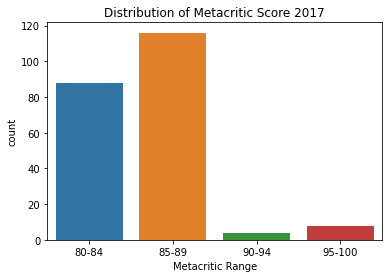

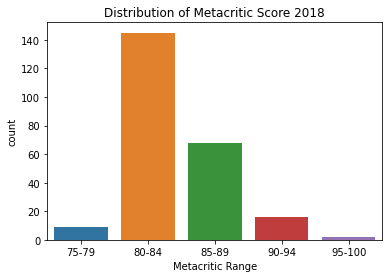

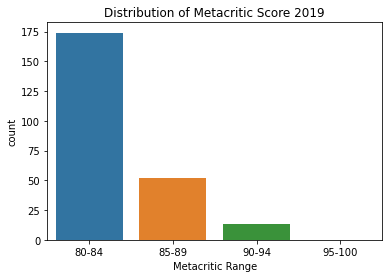

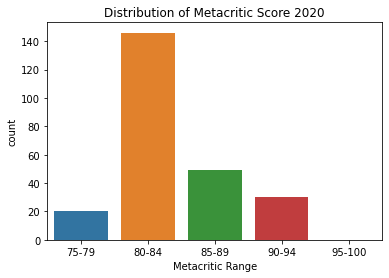

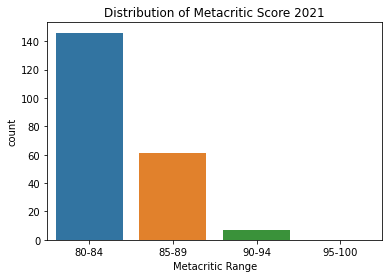

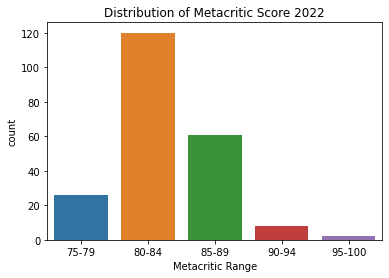

In [22]:
# Graphing each year from 2017-2022

features_2017 = game_features_separated[(game_features_separated['Year'] == '2017')]
sns.countplot(data=features_2017, x='Metacritic Range',order=['80-84','85-89','90-94','95-100'])
plt.title('Distribution of Metacritic Score 2017')
plt.show()

features_2018 = game_features_separated[(game_features_separated['Year'] == '2018')]
sns.countplot(data=features_2018, x='Metacritic Range',order=['75-79','80-84','85-89','90-94','95-100'])
plt.title('Distribution of Metacritic Score 2018')
plt.show()

features_2019 = game_features_separated[(game_features_separated['Year'] == '2019')]
sns.countplot(data=features_2019, x='Metacritic Range',order=['80-84','85-89','90-94','95-100'])
plt.title('Distribution of Metacritic Score 2019')
plt.show()

features_2020 = game_features_separated[(game_features_separated['Year'] == '2020')]
sns.countplot(data=features_2020, x='Metacritic Range',order=['75-79','80-84','85-89','90-94','95-100'])
plt.title('Distribution of Metacritic Score 2020')
plt.show()

features_2021 = game_features_separated[(game_features_separated['Year'] == '2021')]
sns.countplot(data=features_2021, x='Metacritic Range',order=['80-84','85-89','90-94','95-100'])
plt.title('Distribution of Metacritic Score 2021')
plt.show()

features_2022 = game_features_separated[(game_features_separated['Year'] == '2022')]
sns.countplot(data=features_2022, x='Metacritic Range',order=['75-79','80-84','85-89','90-94','95-100'])
plt.title('Distribution of Metacritic Score 2022')
plt.show()

We can see that the trend from year to year is about the same. Most of the top 100 games of each year range between 80 and 84. Very few games manage to enter the 95 to 100 range, and 2017 has the most in that range. Games in the 75-79 range appear infrequently, and are most common in 2022.

### Countplot Graph of the Top 10 Most Common Features Each Year

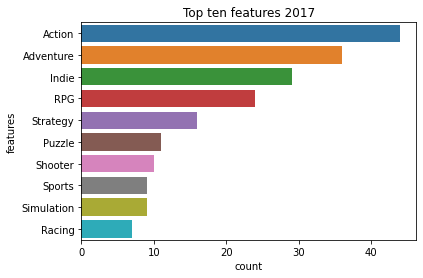

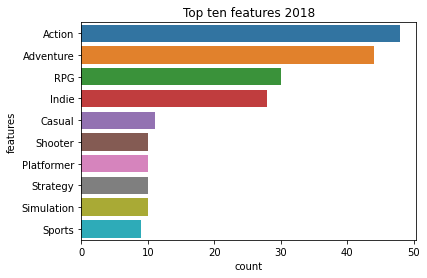

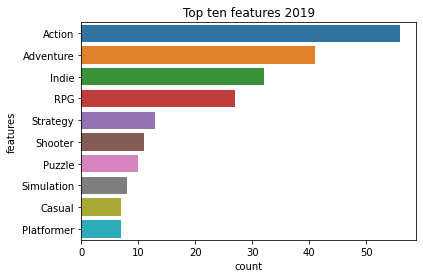

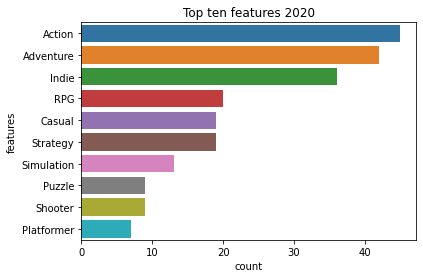

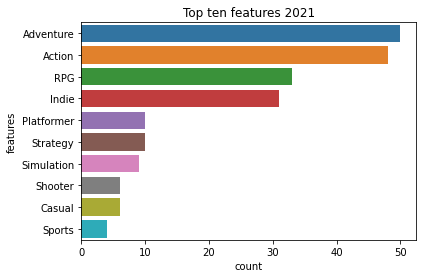

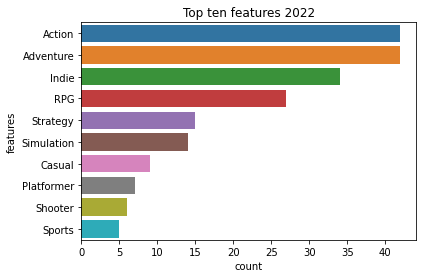

In [23]:
# graphs the top ten feature plots for each year

sns.countplot(data=game_features_separated[game_features_separated['Year']=='2017'],y='features', order=index1)
plt.title('Top ten features 2017')

plt.show()
sns.countplot(data=game_features_separated[game_features_separated['Year']=='2018'],y='features', order=index2)
plt.title('Top ten features 2018')
plt.show()
sns.countplot(data=game_features_separated[game_features_separated['Year']=='2019'],y='features', order=index3)
plt.title('Top ten features 2019')
plt.show()
sns.countplot(data=game_features_separated[game_features_separated['Year']=='2020'],y='features', order=index4)
plt.title('Top ten features 2020')
plt.show()
sns.countplot(data=game_features_separated[game_features_separated['Year']=='2021'],y='features', order=index5)
plt.title('Top ten features 2021')
plt.show()
sns.countplot(data=game_features_separated[game_features_separated['Year']=='2022'],y='features', order=index6)
plt.title('Top ten features 2022')
plt.show()

Here we calculated the frequency of features that appeared in the games within the top 100 metacritic scores for each year. 

We can see the same trend from our countplot data, where the most frequent features of games in these score ranges are 'Action', 'Adventure', 'RPG', and 'Indie', with these features also being the only ones to accompany games with ratings of 95-100 throughout all five years.

### Countplot Graph of the Frequency of the Top Ten Features of Each Year Grouped by Metacritic Score

Since we now know the most common features and the scores for each year. We want to graph both the features and scores together to get an understanding of the relationship between features and scores.

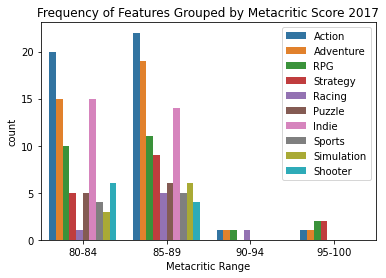

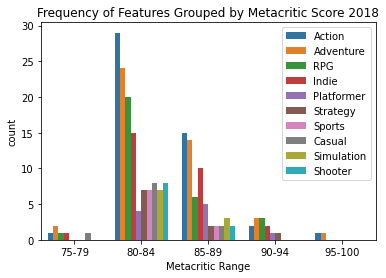

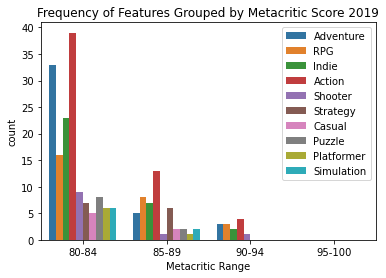

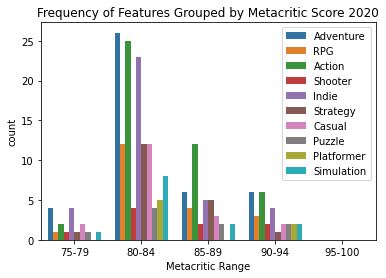

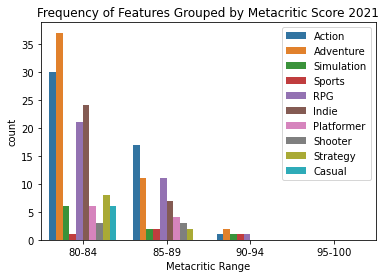

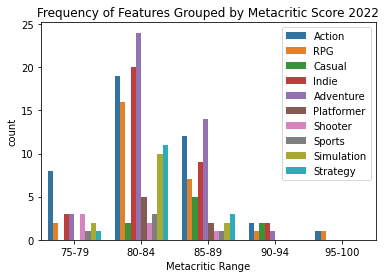

In [24]:
# Graphing each year from 2017-2022

features_2017 = game_features_separated[(game_features_separated['features'].isin(index1)) & (game_features_separated['Year'] == '2017')]
sns.countplot(data=features_2017, x='Metacritic Range',hue='features',order=['80-84','85-89','90-94','95-100'])
plt.legend(loc='upper right')
plt.title('Frequency of Features Grouped by Metacritic Score 2017')
plt.show()

features_2018 = game_features_separated[(game_features_separated['features'].isin(index2)) & (game_features_separated['Year'] == '2018')]
sns.countplot(data=features_2018, x='Metacritic Range',hue='features',order=['75-79','80-84','85-89','90-94','95-100'])
plt.legend(loc='upper right')
plt.title('Frequency of Features Grouped by Metacritic Score 2018')
plt.show()

features_2019 = game_features_separated[(game_features_separated['features'].isin(index3)) & (game_features_separated['Year'] == '2019')]
sns.countplot(data=features_2019, x='Metacritic Range',hue='features',order=['80-84','85-89','90-94','95-100'])
plt.legend(loc='upper right')
plt.title('Frequency of Features Grouped by Metacritic Score 2019')
plt.show()

features_2020 = game_features_separated[(game_features_separated['features'].isin(index4)) & (game_features_separated['Year'] == '2020')]
sns.countplot(data=features_2020, x='Metacritic Range',hue='features',order=['75-79','80-84','85-89','90-94','95-100'])
plt.legend(loc='upper right')
plt.title('Frequency of Features Grouped by Metacritic Score 2020')
plt.show()

features_2021 = game_features_separated[(game_features_separated['features'].isin(index5)) & (game_features_separated['Year'] == '2021')]
sns.countplot(data=features_2021, x='Metacritic Range',hue='features',order=['80-84','85-89','90-94','95-100'])
plt.legend(loc='upper right')
plt.title('Frequency of Features Grouped by Metacritic Score 2021')
plt.show()

features_2022 = game_features_separated[(game_features_separated['features'].isin(index6)) & (game_features_separated['Year'] == '2022')]
sns.countplot(data=features_2022, x='Metacritic Range',hue='features',order=['75-79','80-84','85-89','90-94','95-100'])
plt.legend(loc='upper right')
plt.title('Frequency of Features Grouped by Metacritic Score 2022')
plt.show()

From the following graphs, we can see that 'Action', 'Adventure', 'RPG', and 'Indie' appear considerably more than other features. 'Action', 'Adventure', 'RPG', and 'Strategy' all have appeared atleast once in the 95 to 100 score range. Only 'Indie' does not appear once in that score range despite appearing more than 'strategy' overall. 

### Lineplot Graph of the Frequency of the Top Ten Features of Each Year

Last, we will create a dataset to count the number of appearances a feature has for each year and graph the the top ten features for each year.

In [25]:
feature_list = index1.tolist() + index2.tolist() + index3.tolist() + index4.tolist() + index5.tolist() + index6.tolist()
feature_list = [*set(feature_list)]

# test = pd.DataFrame(feature_list)
# test = test.rename({0:'feature'},axis=1)

years = ['2017','2018','2019','2020','2021','2022']

feature_count_by_year = pd.DataFrame(years)
feature_count_by_year = feature_count_by_year.rename({0:'year'},axis=1)

# creates a new list that counts the number of features for each year
# and places the count under the column with the feature's name
for feature in feature_list:
    
    def total_count(year):
        return game_features_separated[game_features_separated['Year']==year]['features'].value_counts()[feature]
    
    feature_count_by_year[feature] = feature_count_by_year['year'].apply(total_count)
    
feature_count_by_year


,year,RPG,Sports,Puzzle,Strategy,Casual,Adventure,Shooter,Action,Indie,Simulation,Platformer,Racing
0,2017,24,9,11,16,4,36,10,44,29,9,6,7
1,2018,30,9,7,10,11,44,10,48,28,10,10,5
2,2019,27,7,10,13,7,41,11,56,32,8,7,5
3,2020,20,6,9,19,19,42,9,45,36,13,7,4
4,2021,33,4,3,10,6,50,6,48,31,9,10,2
5,2022,27,5,3,15,9,42,6,42,34,14,7,2


Note that each of the columns are features that have appeared at least once in the top ten from 2017 to 2022

Text(0.5, 0, 'Year')

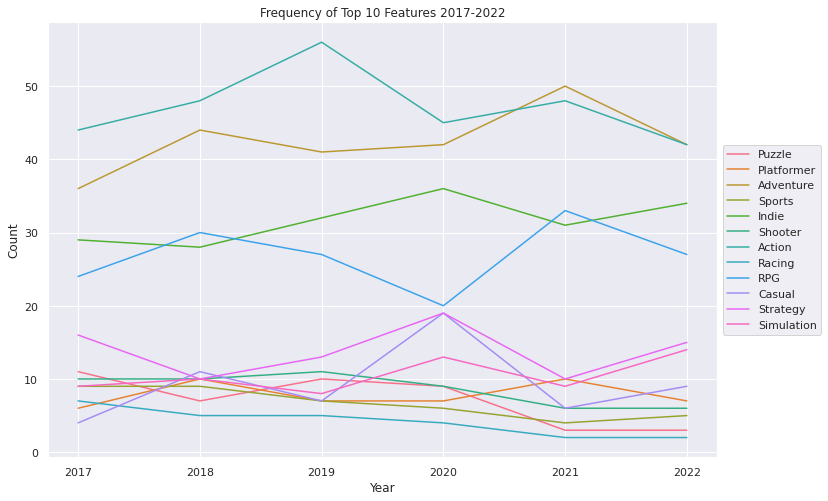

In [13]:
sns.set(rc={"figure.figsize":(12, 8)})
fig = sns.lineplot(data=feature_count_by_year[feature_list],dashes=False)
plt.xticks(range(len(years)), years)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Frequency of Top 10 Features 2017-2022')
plt.ylabel('Count')
plt.xlabel('Year')

Here we calculated the frequency of features that appeared in the games within the top 100 metacritic scores over all years from 2017-2022.

We can see a clearer trend of the counts of game features among the top 100 rated games, where the most frequent features of games in these score ranges by a significant margin are 'Action', 'Adventure', 'RPG', and 'Indie'. There is a notable increase in 2020 for the 'Strategy' and 'Casual' features, but this trend did not last into the next two years.

## Data Analysis

### Chi-square test: How does the actual distribution compare to a no-correlation distribution?

In [14]:
data_2017 = feature_count_by_year.iloc[0].to_numpy()
chi2_2017, p_value_2017 = scipy.stats.chisquare(data_2017[1:])

data_2018 = feature_count_by_year.iloc[1].to_numpy()
chi2_2018, p_value_2018 = scipy.stats.chisquare(data_2018[1:])

data_2019 = feature_count_by_year.iloc[2].to_numpy()
chi2_2019, p_value_2019 = scipy.stats.chisquare(data_2019[1:])

data_2020 = feature_count_by_year.iloc[3].to_numpy()
chi2_2020, p_value_2020 = scipy.stats.chisquare(data_2020[1:])

data_2021 = feature_count_by_year.iloc[4].to_numpy()
chi2_2021, p_value_2021 = scipy.stats.chisquare(data_2021[1:])

data_2022 = feature_count_by_year.iloc[5].to_numpy()
chi2_2022, p_value_2022 = scipy.stats.chisquare(data_2022[1:])

print('For 2017, Chi Squared is', chi2_2017, 'and the corresponding p value is', p_value_2017, '\n',
     'For 2018, Chi Squared is', chi2_2018, 'and the corresponding p value is', p_value_2018, '\n',
     'For 2019, Chi Squared is', chi2_2019, 'and the corresponding p value is', p_value_2019, '\n',
     'For 2020, Chi Squared is', chi2_2020, 'and the corresponding p value is', p_value_2020, '\n',
     'For 2021, Chi Squared is', chi2_2021, 'and the corresponding p value is', p_value_2021, '\n',
     'For 2022, Chi Squared is', chi2_2022, 'and the corresponding p value is', p_value_2022)

For 2017, Chi Squared is 110.45365853658538 and the corresponding p value is 1.4869474170307767e-18 
 For 2018, Chi Squared is 134.75675675675677 and the corresponding p value is 1.8922084960129903e-23 
 For 2019, Chi Squared is 161.49999999999997 and the corresponding p value is 6.585379896050765e-29 
 For 2020, Chi Squared is 118.89519650655023 and the corresponding p value is 3.023754618128203e-20 
 For 2021, Chi Squared is 197.58490566037733 and the corresponding p value is 2.3573001175046548e-36 
 For 2022, Chi Squared is 145.72815533980582 and the corresponding p value is 1.1098568895384472e-25


In order to analyze the distribution of popular features we have gathered, we performed a Chi-Squared Test on each year, observing the twelve most popular features. This test essentially draws a comparison of the expected results against the actual results of the feature distribution. 

The null hypothesis for this data would be that the expected result would be each feature being equally represented each year, indicating that feature and popularity/rating are not correlated. As this set of data consists of twelve different features, the degrees of freedom would be 11. Knowing our degrees of freedom, if we take a standard critical value of 0.05, then this correlates to a chi-squared value of 19.68. 

When using the scipy.stats.chisquare function to compute a value for chi squared, an extremely high value is found for each year, each being well over 100. Chi squared values this high show a great difference in the expected result against the observed, and imply a very strong correlation that features affects consumer and critic opinion. Additionally, the p values calculated by this function are wildly small, implying statistical significance between the two variables. 

This analysis result supports the rejection of the null hypothesis, and suggests a correlation between features and consumer opinion.

### T-test: How do the means of the score of games with the top 10 features compare to the means of the rest?

A t-test will be performed to compare the means of the metacritic score of games that contain the top 10 features vs. the metacritic score of games that do not. This will show if there is a statistical difference between the means, ultimately revealing if there features has correlation to metacritic score.

$ \bar{x} =$ average of metacritic score of games with features in the top 10

$ \bar{y} =$ average of metacritic score of games without features in the top 10

$ H_0 : \bar{x} = \bar{y} $

$ H_a : \bar{x} \neq \bar{y} $

In [83]:
# T-test calculation

# 2017 Data
ttest_2017_data_x = game_features_separated[(game_features_separated['Year']=='2017') & (game_features_separated['features'].isin(index1.tolist()))]
ttest_2017_data_y = game_features_separated[(game_features_separated['Year']=='2017') & (~game_features_separated['features'].isin(index1.tolist()))]

ttest_2017_data_x = ttest_2017_data_x[~ttest_2017_data_x.index.duplicated(keep='first')]
ttest_2017_data_y = ttest_2017_data_y[~ttest_2017_data_y.index.duplicated(keep='first')]

t1 = ttest_ind(ttest_2017_data_x['Metacritic Score'],ttest_2017_data_y['Metacritic Score'])

# 2018 Data
ttest_2018_data_x = game_features_separated[(game_features_separated['Year']=='2018') & (game_features_separated['features'].isin(index2.tolist()))]
ttest_2018_data_y = game_features_separated[(game_features_separated['Year']=='2018') & (~game_features_separated['features'].isin(index2.tolist()))]

ttest_2018_data_x = ttest_2018_data_x[~ttest_2018_data_x.index.duplicated(keep='first')]
ttest_2018_data_y = ttest_2018_data_y[~ttest_2018_data_y.index.duplicated(keep='first')]

t2= ttest_ind(ttest_2018_data_x['Metacritic Score'],ttest_2018_data_y['Metacritic Score'])

# 2019 Data
ttest_2019_data_x = game_features_separated[(game_features_separated['Year']=='2019') & (game_features_separated['features'].isin(index3.tolist()))]
ttest_2019_data_y = game_features_separated[(game_features_separated['Year']=='2019') & (~game_features_separated['features'].isin(index3.tolist()))]

ttest_2019_data_x = ttest_2019_data_x[~ttest_2019_data_x.index.duplicated(keep='first')]
ttest_2019_data_y = ttest_2019_data_y[~ttest_2019_data_y.index.duplicated(keep='first')]

t3 =ttest_ind(ttest_2019_data_x['Metacritic Score'],ttest_2019_data_y['Metacritic Score'])

# 2020 Data
ttest_2020_data_x = game_features_separated[(game_features_separated['Year']=='2020') & (game_features_separated['features'].isin(index4.tolist()))]
ttest_2020_data_y = game_features_separated[(game_features_separated['Year']=='2020') & (~game_features_separated['features'].isin(index4.tolist()))]

ttest_2020_data_x = ttest_2020_data_x[~ttest_2020_data_x.index.duplicated(keep='first')]
ttest_2020_data_y = ttest_2020_data_y[~ttest_2020_data_y.index.duplicated(keep='first')]

t4 =ttest_ind(ttest_2020_data_x['Metacritic Score'],ttest_2020_data_y['Metacritic Score'])

# 2021 Data
ttest_2021_data_x = game_features_separated[(game_features_separated['Year']=='2021') & (game_features_separated['features'].isin(index4.tolist()))]
ttest_2021_data_y = game_features_separated[(game_features_separated['Year']=='2021') & (~game_features_separated['features'].isin(index4.tolist()))]

ttest_2021_data_x = ttest_2021_data_x[~ttest_2021_data_x.index.duplicated(keep='first')]
ttest_2021_data_y = ttest_2021_data_y[~ttest_2021_data_y.index.duplicated(keep='first')]

t5 =ttest_ind(ttest_2021_data_x['Metacritic Score'],ttest_2021_data_y['Metacritic Score'])

# 2022 Data
ttest_2022_data_x = game_features_separated[(game_features_separated['Year']=='2022') & (game_features_separated['features'].isin(index4.tolist()))]
ttest_2022_data_y = game_features_separated[(game_features_separated['Year']=='2022') & (~game_features_separated['features'].isin(index4.tolist()))]

ttest_2022_data_x = ttest_2022_data_x[~ttest_2022_data_x.index.duplicated(keep='first')]
ttest_2022_data_y = ttest_2022_data_y[~ttest_2022_data_y.index.duplicated(keep='first')]

t6 =ttest_ind(ttest_2022_data_x['Metacritic Score'],ttest_2022_data_y['Metacritic Score'])

# All years combined
ttest_alltime_data_x = game_features_separated[game_features_separated['features'].isin(feature_list)]
ttest_alltime_data_y = game_features_separated[~game_features_separated['features'].isin(feature_list)]

ttest_alltime_data_x = ttest_alltime_data_x[~ttest_alltime_data_x.index.duplicated(keep='first')]
ttest_alltime_data_y = ttest_alltime_data_y[~ttest_alltime_data_y.index.duplicated(keep='first')]

t7 =ttest_ind(ttest_alltime_data_x['Metacritic Score'],ttest_alltime_data_y['Metacritic Score'])

print('2017')
print(t1)
print('2018')
print(t2)
print('2019')
print(t3)
print('2020')
print(t4)
print('2021')
print(t5)
print('2022')
print(t6)
print('All years combined')
print(t7)

2017
Ttest_indResult(statistic=-1.1639877513604233, pvalue=0.24704223052610325)
2018
Ttest_indResult(statistic=-0.3845063271581773, pvalue=0.7013258731459968)
2019
Ttest_indResult(statistic=1.2447852812672864, pvalue=0.21578611889464464)
2020
Ttest_indResult(statistic=1.0511636884021143, pvalue=0.29564337934202095)
2021
Ttest_indResult(statistic=-1.2435800142157931, pvalue=0.21707308438781325)
2022
Ttest_indResult(statistic=1.4292569973782772, pvalue=0.15624532727613832)
All years combined
Ttest_indResult(statistic=1.1260382007323286, pvalue=0.2605972960858538)


### T-test Interpretation

The independent t-tests were used to compare the mean Metacritic score of games that contain the top 10 features versus the Metacritic Scores of games that do not. Here is our interpretation of the test results:

The years in question had varying levels of departure from the estimated value of mean Metacritic score, all within ~1.5 standard deviations from the estimate, with all years combined closing in at 1.12 SD's above the estimate. That being said, for this study our acceptable probability value was set at 5%, which amounts to a p-value of 0.05, and none of the years (nor the sum thereof) managed to make it below this probability.

This means that this analysis we cannot support rejecting the null hypothesis, that the mean Metacritic scores of games with and without the top 10 features are equal, for any of the years, nor them all combined.

### Analysis-of-Variance (ANOVA) Test: How do the distributions of scores of games group by features compare?

An ANOVA test will now be performed to compare the mean of the metacritic score of games grouped by features. This will reveal if there is a significant different between the average metacritic score between features.

$ \bar{x} =$ average of metacritic score of games with a given feature

$ H_0 : \bar{x_1} = \bar{x_2} = \bar{x_3} = \ldots $

$ H_a$ : at least one group mean is different 

In [87]:
# ANOVA test calculation

# 2017 calculation
anova_2017_data = game_features_separated[(game_features_separated['Year']=='2017')]
anova_2017_features = anova_2017_data['features'].unique()
l = []

for entry in anova_2017_features:
    l.append(anova_2017_data[anova_2017_data['features'] == entry]['Metacritic Score'].values.tolist())

t1 = f_oneway(l[0],l[1],l[2],l[3],l[4],l[5],l[6],l[7],l[8],l[9],l[10],l[11],l[12],l[13],l[14],l[15],l[16])

# 2018 calculation
anova_2018_data = game_features_separated[(game_features_separated['Year']=='2018')]
anova_2018_features = anova_2018_data['features'].unique()
l = []

for entry in anova_2018_features:
    l.append(anova_2018_data[anova_2018_data['features'] == entry]['Metacritic Score'].values.tolist())

t2 = f_oneway(l[0],l[1],l[2],l[3],l[4],l[5],l[6],l[7],l[8],l[9],l[10],l[11],l[12],l[13],l[14],l[15],l[16],l[17])

# 2019 calculation
anova_2019_data = game_features_separated[(game_features_separated['Year']=='2019')]
anova_2019_features = anova_2019_data['features'].unique()
l = []

for entry in anova_2019_features:
    l.append(anova_2019_data[anova_2019_data['features'] == entry]['Metacritic Score'].values.tolist())

t3 = f_oneway(l[0],l[1],l[2],l[3],l[4],l[5],l[6],l[7],l[8],l[9],l[10],l[11],l[12],l[13],l[14],l[15],l[16])

# 2020 calculation
anova_2020_data = game_features_separated[(game_features_separated['Year']=='2020')]
anova_2020_features = anova_2020_data['features'].unique()
l = []

for entry in anova_2020_features:
    l.append(anova_2020_data[anova_2020_data['features'] == entry]['Metacritic Score'].values.tolist())


t4 = f_oneway(l[0],l[1],l[2],l[3],l[4],l[5],l[6],l[7],l[8],l[9],l[10],l[11],l[12],l[13],l[14],l[15],l[16],l[17],l[18])

# 2021 calculation
anova_2021_data = game_features_separated[(game_features_separated['Year']=='2021')]
anova_2021_features = anova_2021_data['features'].unique()
l = []

for entry in anova_2021_features:
    l.append(anova_2021_data[anova_2021_data['features'] == entry]['Metacritic Score'].values.tolist())

t5 = f_oneway(l[0],l[1],l[2],l[3],l[4],l[5],l[6],l[7],l[8],l[9],l[10],l[11],l[12],l[13])

# 2022 calculation
anova_2022_data = game_features_separated[(game_features_separated['Year']=='2022')]
anova_2022_features = anova_2022_data['features'].unique()
l = []

for entry in anova_2022_features:
    l.append(anova_2022_data[anova_2022_data['features'] == entry]['Metacritic Score'].values.tolist())

t6 = f_oneway(l[0],l[1],l[2],l[3],l[4],l[5],l[6],l[7],l[8],l[9],l[10],l[11],l[12],l[13],l[14],l[15])

# All years combined
l = []

for entry in feature_list:
    l.append(game_features_separated[game_features_separated['features'] == entry]['Metacritic Score'].values.tolist())

t7 = f_oneway(l[0],l[1],l[2],l[3],l[4],l[5],l[6],l[7],l[8],l[9],l[10],l[11])

print('2017')
print(t1)
print('2018')
print(t2)
print('2019')
print(t3)
print('2020')
print(t4)
print('2021')
print(t5)
print('2022')
print(t6)
print('All years combined')
print(t7)

2017
F_onewayResult(statistic=1.2891728755406249, pvalue=0.2067536845500874)
2018
F_onewayResult(statistic=1.0153577685857185, pvalue=0.44243038902339366)
2019
F_onewayResult(statistic=0.5152346955850117, pvalue=0.9378529165501296)
2020
F_onewayResult(statistic=0.49243466976917216, pvalue=0.9597657257441397)
2021
F_onewayResult(statistic=1.4108476860656807, pvalue=0.15660021758479015)
2022
F_onewayResult(statistic=1.1260670305067844, pvalue=0.33488494733488366)
All years combined
F_onewayResult(statistic=1.0992206220906882, pvalue=0.35788468745680385)


### ANOVA Interpretation

An ANOVA test was used to compare the means of the Metacritic score of games grouped by features. The variance within and between these groups were calculated and presented by year, and then all together.

Based on the results above, the variance for between-group Metacritic score means was between ~0.5 to ~1.5 times the variance for within-group Metacritic score means, with the set of all years landing at a near equal vairance for between & within group means. That being said, for this study our acceptable probability value was set at 5%, which amounts to a p-value of 0.05, and none of the years (nor the sum thereof) managed to make it below this probability.

This suggests that the null hypothesis, stating that there is no difference in variability of mean Metacritic scores for games with different features, cannot be rejected.

# Ethics & Privacy

To protect the privacy of individuals associated with the games who's data was collected, we have only used anonymized and aggregated data in our analysis. The dataset does not contain any personally identifiable information about game developers, players, or other related individuals. We have ensured that the data we collected and analyzed from the RAWG website does not compromise anyone's privacy or violate any privacy policies.

To remain ethical in our handling of data & it's analysis, we have conducted our analysis in an honest and accurate manner to the best of our abilities throughout our research, while remaining transparent for as many analysis decisions as relevant. We have also taken care to avoid potential biases and perform analysis as critically as possible, to avoid misleading interpretations of the data.

Our intention is to provide valuable insights into the factors influencing game popularity without misrepresenting or manipulating the data. We have followed ethical guidelines in data science and adhered to the principles of integrity, transparency, and respect for privacy.

# Conclusion & Discussion

For our project, we conducted several visualizations and basic analysis' of our data to try and answer our research question and deny our hypothesis (aka to accept our null hypothesis).

Through the visuals, it seemed as though there were four outlier features which occurred at much greater frequencies in the top 100 scores of each year: "Action", "Adventure", "RPG", and "Indie". However, when we performed our analysis of the same data, only one of our tests (chi-squared) returned data which was able to reject our null hypothesis, while the rest(t-test & anova tests) were of p-scores insufficient to do so. We interpreted these results as being insufficient overall to claim that a relatioship exists between any particular feature or group thereof and the scores of the games they label, and so we conclude that our results support our null-hypothesis.

With that being said, many limitations exist in our analysis that when adressed may provide higher quality results to better answer our research question. These limitations include but are not limited to the relative inexperience of the evaluators and related possibility for procedural errors existing within the project, the limited number of features collected & tested for an effect on game scores, and the poor operational definitions of features which may have many overlaps  & confounding make-ups which complicate the results of this study.

# Team Contributions

- **Gavin d'Heilly**: Overall Editing, Background Work, Conclusions and Graph Interpretations, EDA
- **Ryan Truong**: Research Question, ANOVA code & analysis, T-test code & analysis, Data Cleaning, EDA
- **Andrew Minh Nguyen**: Video Presentation & Editor, Dataset Setup code, Data Cleaning, EDA
- **Kophi Westerman**:  Ethics & Privacy, Video Presentation, Chi-square test code & analysis, EDA
- **David Thai**: Hypothesis, Video Presentation, Data Cleaning, EDA